In [77]:
#importnado bibliotecas que foram usadas (algumas não foram no final)
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score

import scipy.stats as stats

In [78]:
#adicionando a base de dados utilizados no programa para fazer a regressão
dados_df = pd.read_excel("database2015.xlsx")
df = pd.read_excel("database2015.xlsx")
dados_df = dados_df.drop(['Municipios'],axis=1) #deletando a coluna com os municipios para ter apenas dados numéricos

In [79]:
#Rodando as estatisticas descritivas de todos os dados
dados_df.describe()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,2.226000,1.917365,4.533735,12.123801,-1.771803,-2.040872,-0.834112,5.270844,0.298559,0.080901,0.213874,0.083964
std,1.165321,0.926068,3.849125,14.950872,1.398367,0.686911,0.376599,0.833671,0.457667,0.272707,0.410076,0.277359
min,-0.495612,-0.264036,0.000005,-0.018407,-13.176310,-4.593322,-3.965579,1.287067,0.000000,0.000000,0.000000,0.000000
25%,1.369079,1.136566,1.291783,1.468197,-2.168555,-2.533387,-1.037613,4.805431,0.000000,0.000000,0.000000,0.000000
50%,2.127715,1.965805,3.864391,7.596641,-1.382271,-2.178836,-0.760122,5.429381,0.000000,0.000000,0.000000,0.000000
75%,2.916922,2.594332,6.730557,17.461299,-0.869490,-1.561276,-0.550939,5.882330,1.000000,0.000000,0.000000,0.000000
max,6.804174,5.846294,34.179149,199.821339,-0.074542,-0.101815,-0.122329,7.297279,1.000000,1.000000,1.000000,1.000000


In [80]:
#Analise de Correlção
dados_df.corr()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
tCO2epc,1.000000,0.251251,0.211928,0.171890,0.474564,-0.217585,-0.520951,0.368826,-0.083295,0.358989,0.090916,0.389828
PIBpc,0.251251,1.000000,0.962700,0.875683,-0.307795,0.391784,-0.392094,-0.051827,0.176111,-0.116975,0.429084,0.187454
PIBpc2,0.211928,0.962700,1.000000,0.970840,-0.352287,0.416066,-0.395831,-0.053075,0.141151,-0.125739,0.390614,0.167577
PIBpc3,0.171890,0.875683,0.970840,1.000000,-0.367745,0.406797,-0.381187,-0.053735,0.117133,-0.117623,0.316921,0.140181
Agro,0.474564,-0.307795,-0.352287,-0.367745,1.000000,-0.543675,-0.333094,0.425371,-0.243250,0.145712,0.085478,0.102251
Ind,-0.217585,0.391784,0.416066,0.406797,-0.543675,1.000000,-0.090412,-0.217727,0.164443,-0.131219,0.016236,-0.027147
Serv,-0.520951,-0.392094,-0.395831,-0.381187,-0.333094,-0.090412,1.000000,-0.084938,0.187906,-0.221507,-0.204984,-0.172062
Dist,0.368826,-0.051827,-0.053075,-0.053735,0.425371,-0.217727,-0.084938,1.000000,0.046355,0.044974,0.044162,-0.001006
Sudeste,-0.083295,0.176111,0.141151,0.117133,-0.243250,0.164443,0.187906,0.046355,1.000000,-0.193560,-0.340292,-0.197519
Norte,0.358989,-0.116975,-0.125739,-0.117623,0.145712,-0.131219,-0.221507,0.044974,-0.193560,1.000000,-0.154749,-0.089823


In [82]:
#definindo y para simplificar a escrita e uma matriz X com a constante para regressão
Y = 'tCO2epc'
dados_df_X = dados_df.drop(Y,axis=1)  
dados_df_X = sm.add_constant(dados_df_X)
#display(dados_df_X)

In [83]:
#definir as matrizes ao quadrado.  Cada matriz é um modelo quadrático que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão

matrix0 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix1 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv'],axis=1)
matrix2 = dados_df_X.drop(['PIBpc3','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix3 = dados_df_X.drop(['PIBpc3'],axis=1)


In [85]:
#Modelo quadrático
modelo0 = sm.OLS(dados_df[Y],matrix0)
res0 = modelo0.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res0.summary())
display(res0.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           7.67e-98
Time:                        12:48:27   Log-Likelihood:                -8506.3
No. Observations:                5550   AIC:                         1.702e+04
Df Residuals:                    5547   BIC:                         1.704e+04
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2311      0.054     22.778      0.0

17038.373215153006

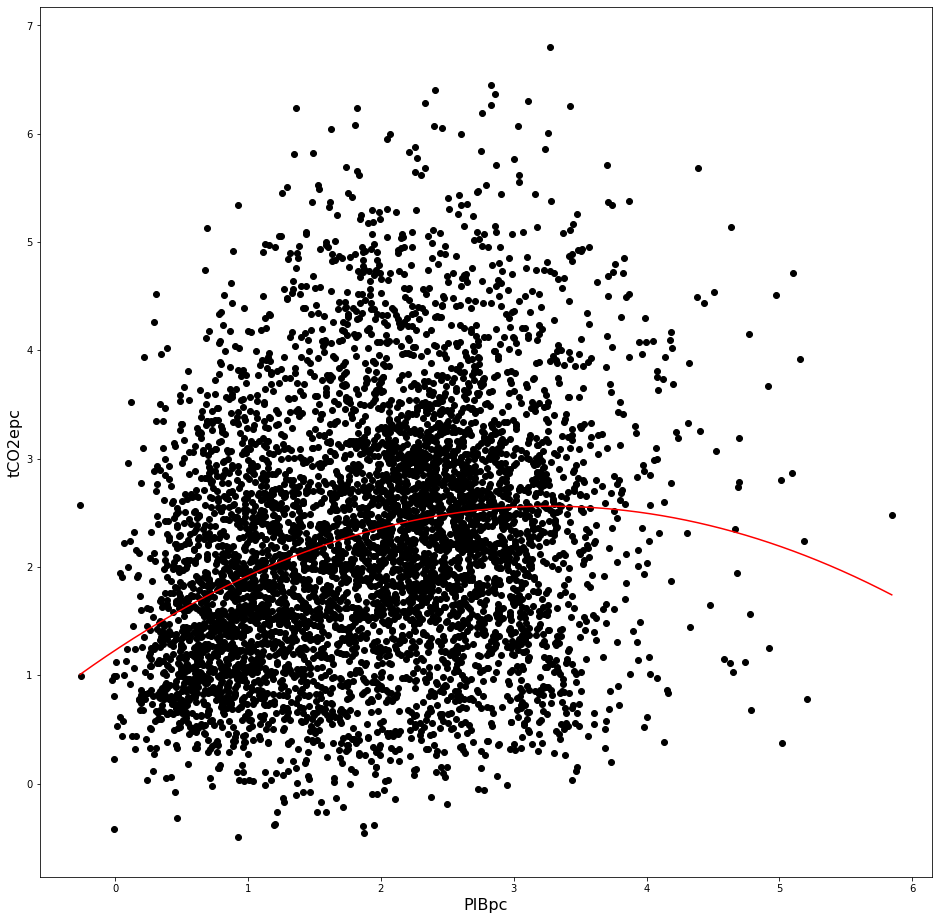

In [86]:
#Plotando um gráfico do modelo Quadrático 
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod0 =  1.2311 + 0.8118*g  -0.1239*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc', fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod0 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [88]:
#Modelo quadratico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix1)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     625.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:49:43   Log-Likelihood:                -6730.9
No. Observations:                5550   AIC:                         1.348e+04
Df Residuals:                    5542   BIC:                         1.353e+04
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2357      0.096    -12.916   

13530.725957134942

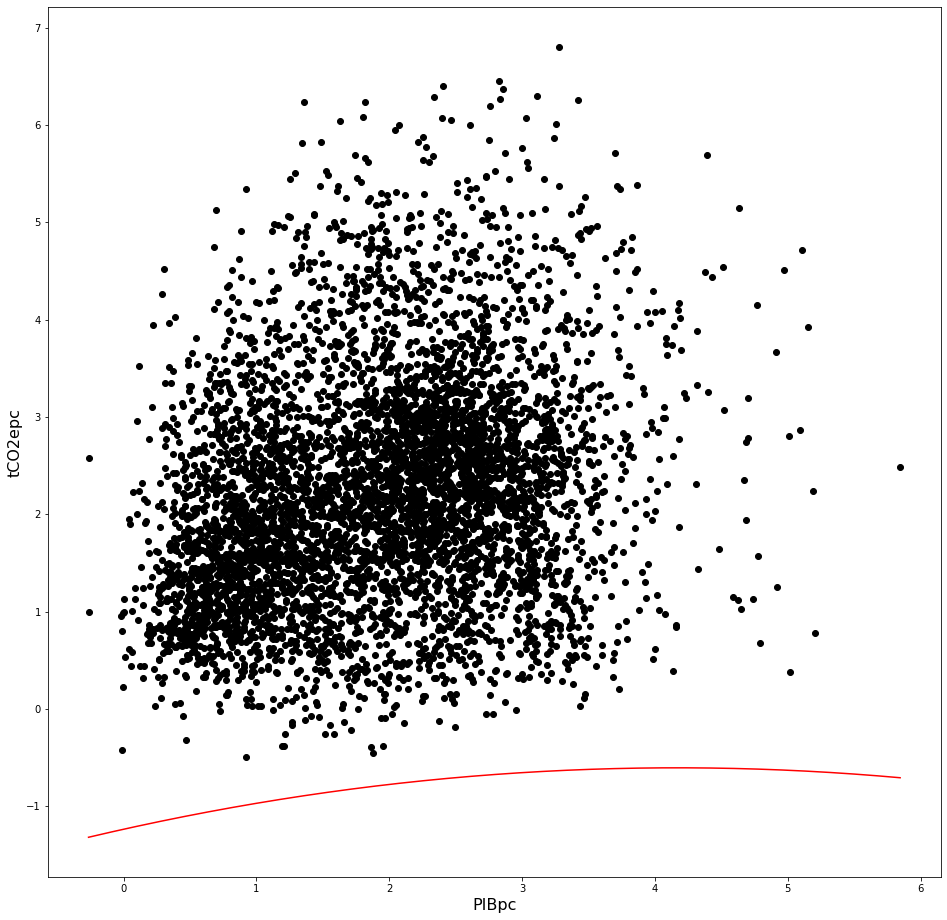

In [89]:
#Plotando um gráfico do modelo Quadrático com impacto regional
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod1 = -1.2357 + 0.3027*g  -0.0363*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod1 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [91]:
# Modelo quadratico com participação do VA dos 3 setores no PIB
modelo = sm.OLS(dados_df[Y],matrix2)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     761.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:50:44   Log-Likelihood:                -7071.1
No. Observations:                5550   AIC:                         1.415e+04
Df Residuals:                    5544   BIC:                         1.419e+04
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6886      0.111      6.218      0.0

14193.878567370864

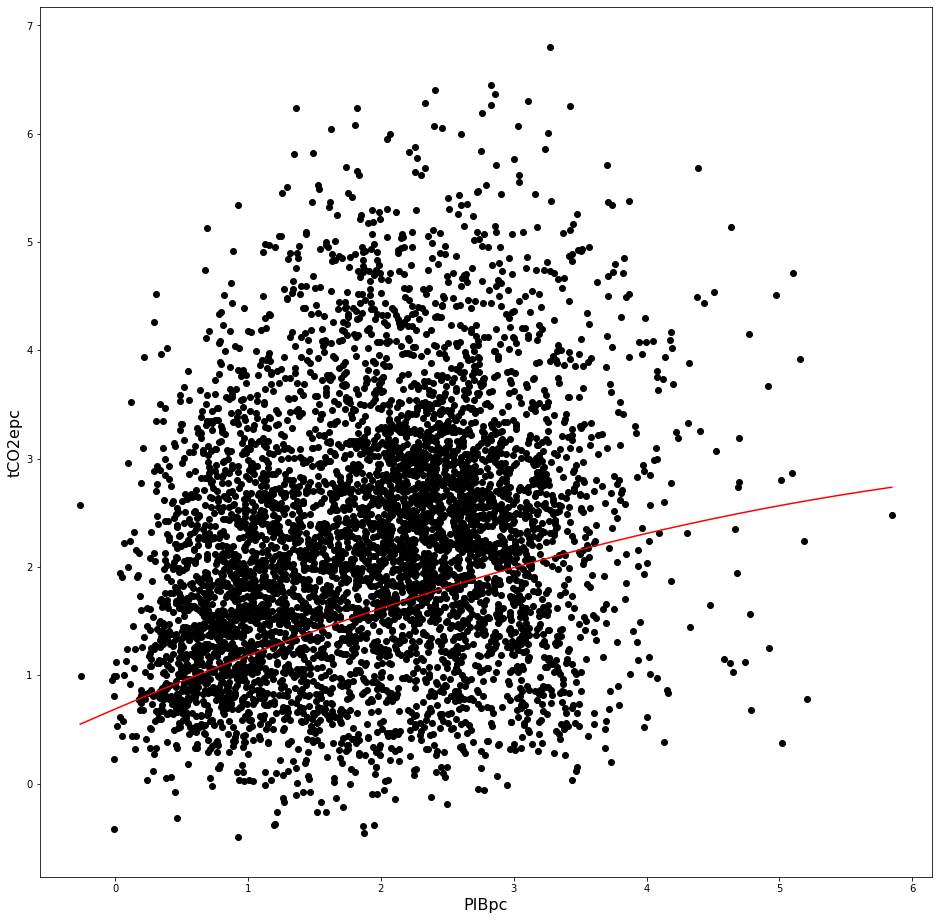

In [92]:
#Plotando um gráfico do Modelo quadratico com participação do VA dos 3 setores no PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(),df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod2 = 0.6886 + 0.5244*g -0.0298*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod2 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [94]:
#Modelo quadratico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix3)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     720.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:53:13   Log-Likelihood:                -5812.4
No. Observations:                5550   AIC:                         1.165e+04
Df Residuals:                    5539   BIC:                         1.172e+04
Df Model:                          10                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5785      0.135     -4.294   

11719.687211566945

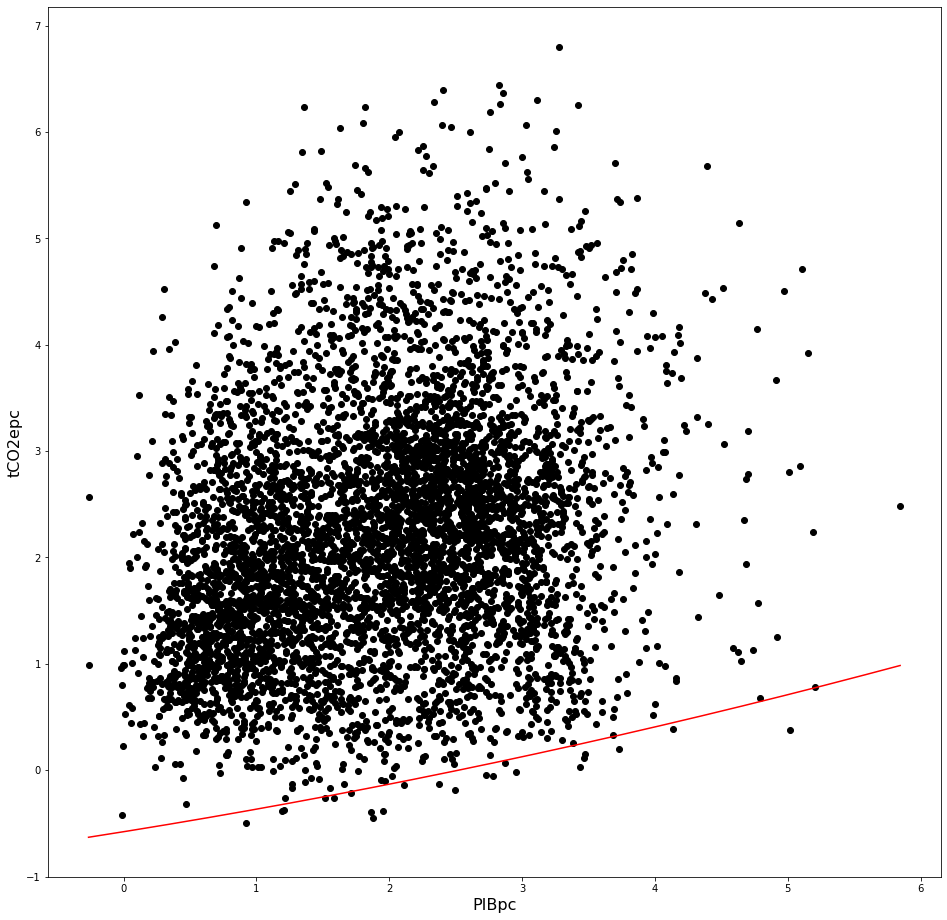

In [95]:
#Plotando um gráfico do modelo Quadrático com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod3 = -0.5785 + 0.2007*g + 0.0114*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc', fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod3 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [96]:
display(dados_df_X)

,const,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
0,1.0,1.882199,3.542673,6.668015,-0.461400,-2.297802,-1.481985,4.634002,0,1,0,0
1,1.0,1.298412,1.685874,2.188959,-0.619968,-2.914571,-1.014146,5.394001,0,1,0,0
2,1.0,1.993804,3.975254,7.925878,-1.281290,-1.464959,-0.918942,5.039027,0,1,0,0
3,1.0,1.946695,3.789621,7.377235,-0.240804,-3.429023,-1.865270,3.104885,0,1,0,0
4,1.0,1.871554,3.502715,6.555520,-0.355498,-2.863462,-1.630412,4.216139,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1.0,1.365087,1.863462,2.543787,-2.460613,-2.136880,-0.409988,6.091087,0,1,0,0
5546,1.0,2.626404,6.898000,18.116937,-0.285009,-2.945874,-1.833227,4.930532,0,1,0,0
5547,1.0,0.961851,0.925157,0.889864,-0.774594,-2.343750,-1.027348,5.313040,0,1,0,0
5548,1.0,1.601721,2.565510,4.109232,-1.925813,-0.724316,-1.384825,5.925798,0,1,0,0


In [97]:
#definir as matrizes cubicas pela letra B. Cada matriz é um modelo cubico que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão
matrix4 = dados_df_X.drop(['Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix5 = dados_df_X.drop(['Agro','Ind','Serv'],axis=1)
matrix6 = dados_df_X.drop(['Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix7 = dados_df_X


In [99]:
#Modelo cubico apenas os PIBpc
modelo = sm.OLS(dados_df[Y],matrix4)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          5.81e-104
Time:                        12:58:55   Log-Likelihood:                -8501.0
No. Observations:                5550   AIC:                         1.701e+04
Df Residuals:                    5546   BIC:                         1.704e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0265      0.077     13.284      0.0

17036.565438110025

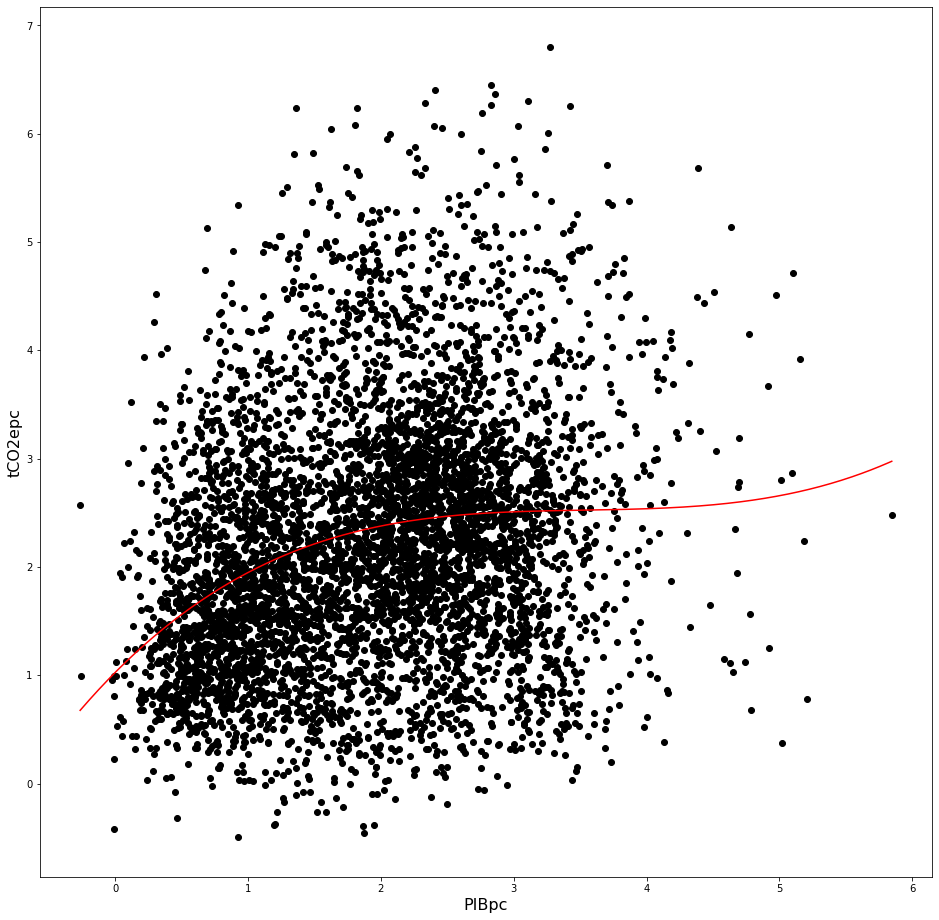

In [100]:
#Gráfico do Modelo cubico
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod4 = 1.0265 + 1.2337*g -0.3440*(g*g) +  0.0325*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod4 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')


In [102]:
#Modelo cubico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix5)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     547.8
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:00:42   Log-Likelihood:                -6717.2
No. Observations:                5550   AIC:                         1.345e+04
Df Residuals:                    5541   BIC:                         1.351e+04
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4768      0.104    -14.245   

13512.045845794777

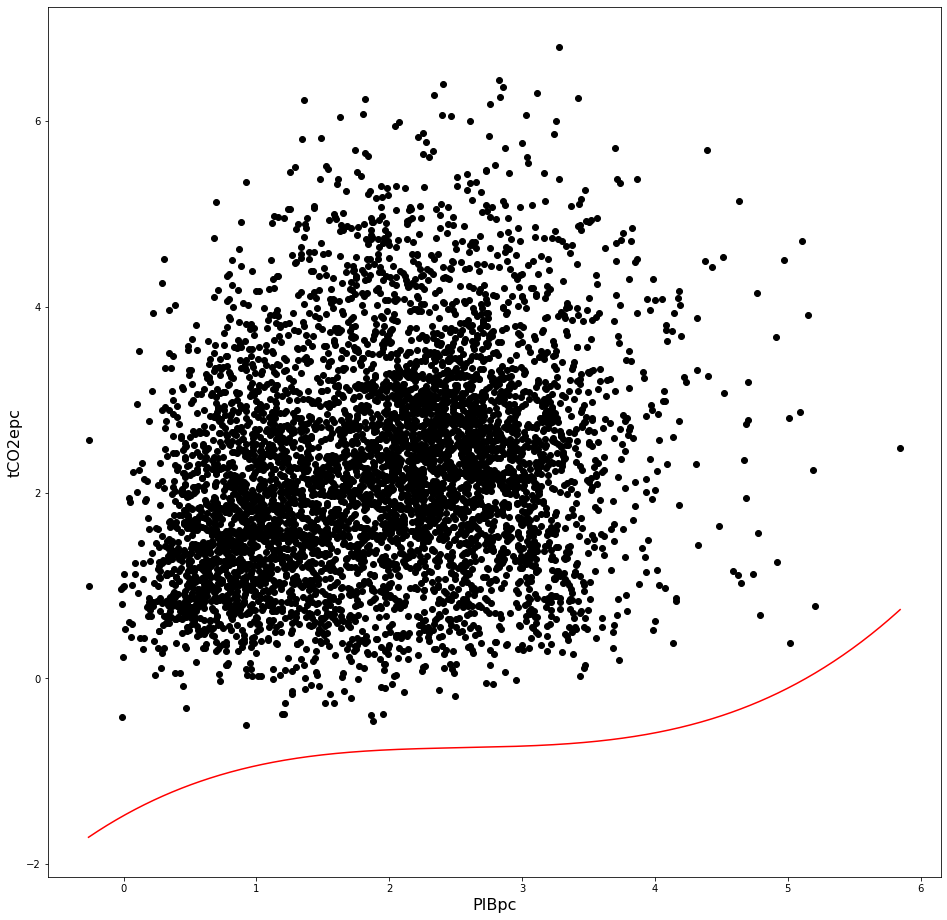

In [103]:
#Gráfico do Modelo cubico com impacto regional
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod5 = -1.4768 + 0.8000*g -0.3011*(g*g) + 0.0392*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod5 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [105]:
# Modelo cubico com participação do VA dos 3 setores no PIB 
modelo = sm.OLS(dados_df[Y],matrix6)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     641.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:02:15   Log-Likelihood:                -7068.8
No. Observations:                5550   AIC:                         1.415e+04
Df Residuals:                    5543   BIC:                         1.420e+04
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6005      0.117      5.135      0.0

14197.972077386452

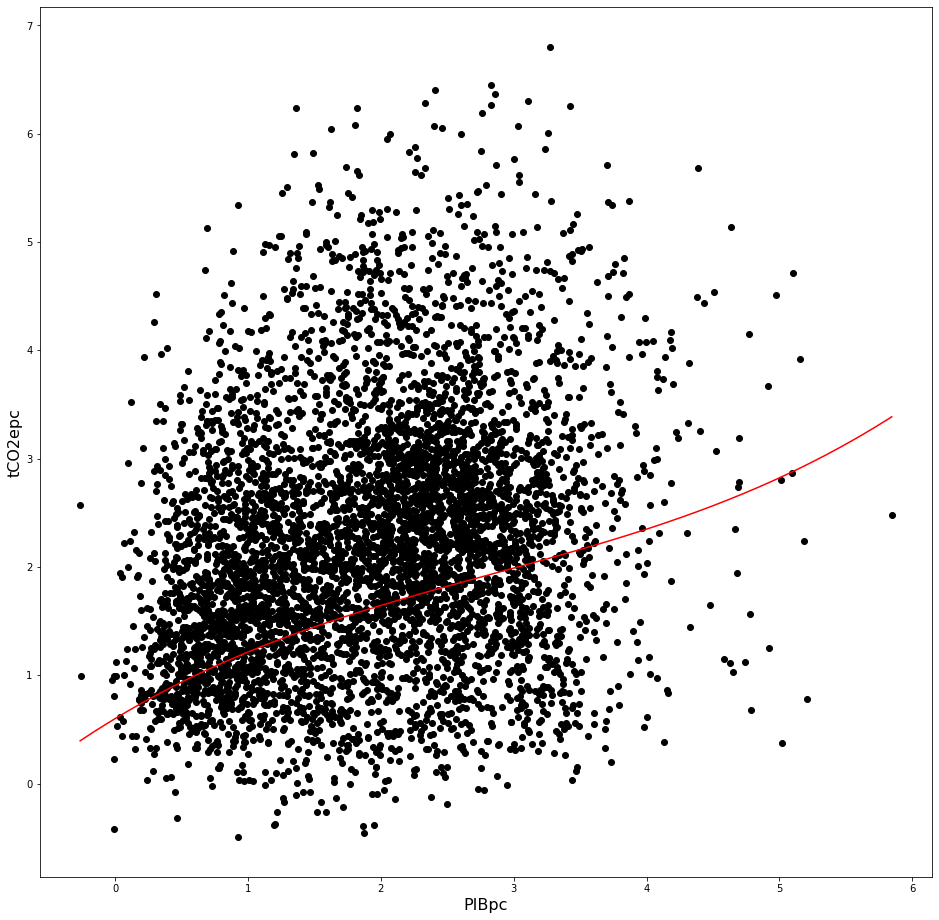

In [106]:
#Gráfico do Modelo cubico com participação do VA dos 3 setores no PIB 
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod6 = 0.6005 + 0.7399*g -0.1421*(g*g) + 0.0166*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod6 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [108]:
# Modelo cubico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix7)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})

print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     653.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:05:28   Log-Likelihood:                -5811.7
No. Observations:                5550   AIC:                         1.165e+04
Df Residuals:                    5538   BIC:                         1.173e+04
Df Model:                          11                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6208      0.138     -4.502   

11726.928773756325

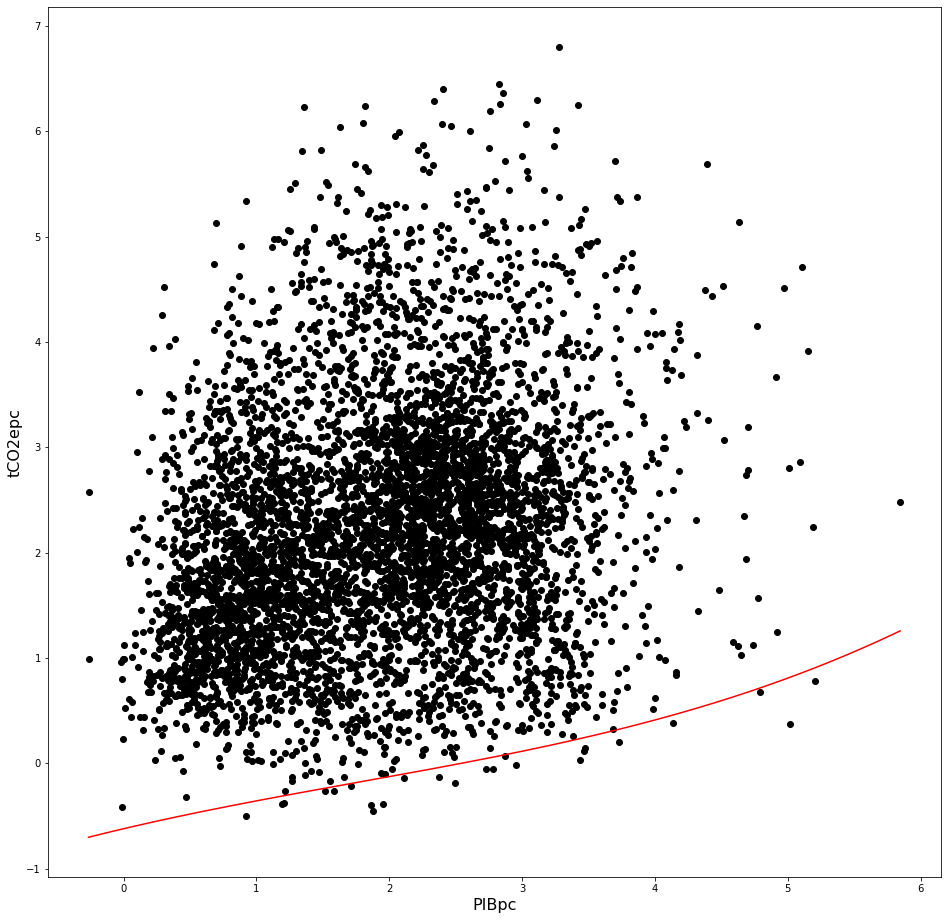

In [109]:
#Gráfico do Modelo cubico com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod7 = -0.6208 + 0.2964*g -0.0396*(g*g) + 0.0075*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod7 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

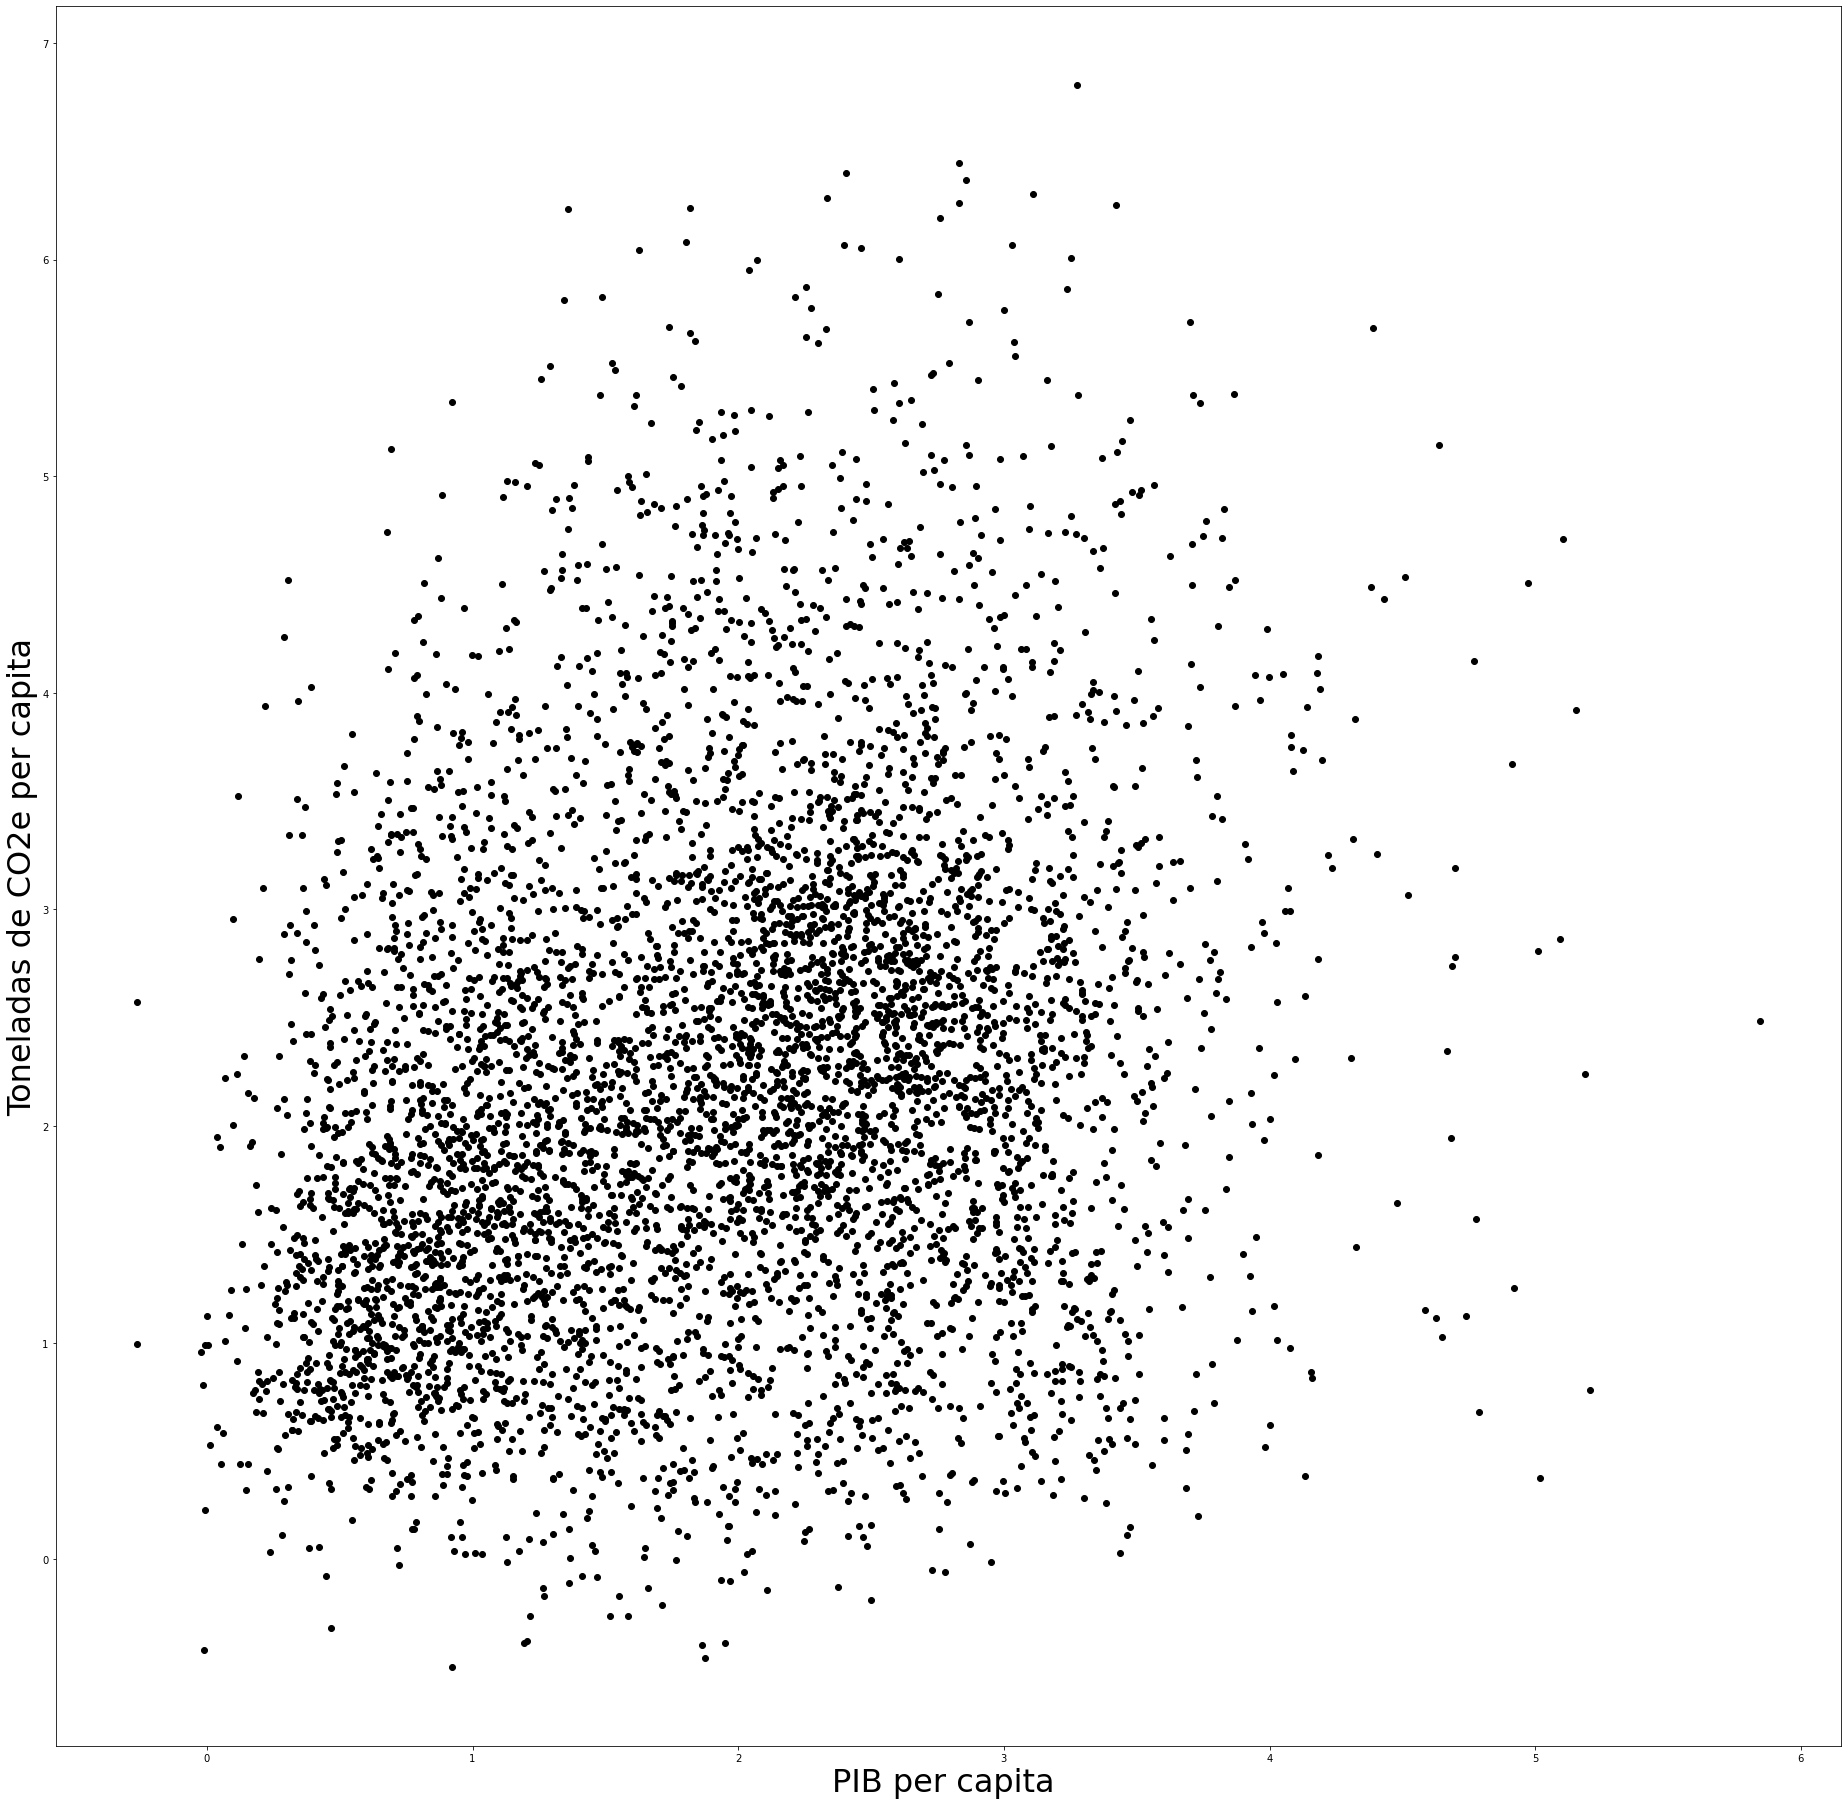

In [110]:
#plotando o gráfico de dispersão das variáveis
plt.figure(figsize = (32,32))
plt.scatter(dados_df['PIBpc'],dados_df['tCO2epc'],c='black')
plt.xlabel("PIB per capita ",fontsize = 32)
plt.ylabel("Toneladas de CO2e per capita", fontsize = 32)
plt.show()

In [111]:
#?sm.OLS
#?sm.QuantReg

modeloq =sm.QuantReg(dados_df[Y],matrix3)
resq = modeloq.fit(q=0.15)

modeloq1 =sm.QuantReg(dados_df[Y],matrix3)
resq1 = modeloq1.fit(q=0.30)

modeloq2 =sm.QuantReg(dados_df[Y],matrix3)
resq2 = modeloq2.fit(q=0.45)

modeloq3 =sm.QuantReg(dados_df[Y],matrix3)
resq3 = modeloq3.fit(q=0.60)

modeloq4 =sm.QuantReg(dados_df[Y],matrix3)
resq4 = modeloq4.fit(q=0.75)

modeloq5 =sm.QuantReg(dados_df[Y],matrix3)
resq5 = modeloq5.fit(q=0.90)

const = [resq.params["const"],resq1.params["const"],resq2.params["const"],resq3.params["const"],resq4.params["const"],resq5.params["const"]]
param1 = [resq.params["PIBpc"],resq1.params["PIBpc"],resq2.params["PIBpc"],resq3.params["PIBpc"],resq4.params["PIBpc"],resq5.params["PIBpc"]]
param2 = [resq.params["PIBpc2"],resq1.params["PIBpc2"],resq2.params["PIBpc2"],resq3.params["PIBpc2"],resq4.params["PIBpc2"],resq5.params["PIBpc2"]]

#print(resq.summary())
#print(resq1.summary())
#print(resq2.summary())
#print(resq3.summary())
#print(resq4.summary())
print(resq5.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:               0.4409
Model:                       QuantReg   Bandwidth:                      0.1358
Method:                 Least Squares   Sparsity:                        4.427
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        13:05:33   Df Residuals:                     5539
                                        Df Model:                           10
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1143      0.218     -0.525      0.600      -0.541       0.313
PIBpc            0.0437      0.083      0.529      0.597      -0.118       0.206
PIBpc2           0.0483      0.019      2.539      0.011       0.011       0.086
Agro             0.1789      0.023      7.

Text(0, 0.5, 'tCO2epc')

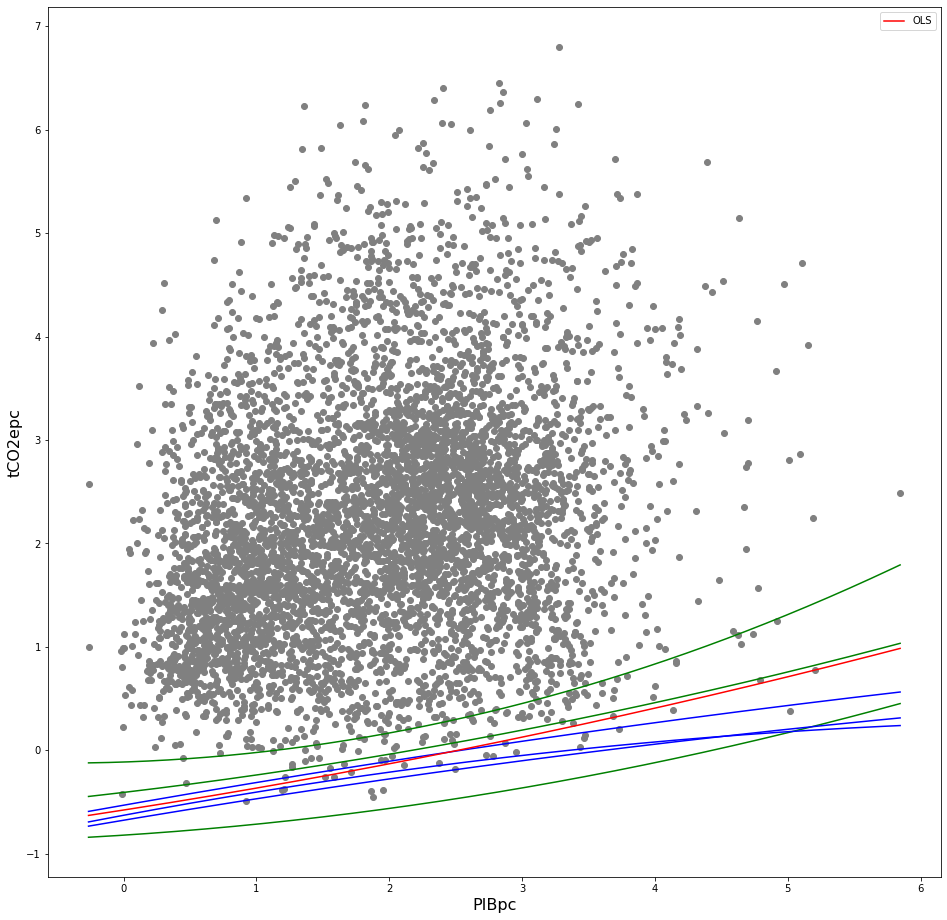

In [112]:
#Regressão Quantilica com o modelo quadrático
x = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y0 = -0.8215 + 0.0832*(x) + 0.0230*(x*x)
y1 = -0.6770 + 0.2154*(x) -0.0079*(x*x)
y2 = -0.6292 + 0.2396*(x) -0.0156*(x*x)
y3 = -0.5317 + 0.2258*(x) -0.0066*(x*x)
y4 = -0.4082 + 0.1525*(x) +0.0161*(x*x)
y5 = -0.1143 + 0.0437*(x) +0.0483*(x*x)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x, y0, color="green")
ax.plot(x, y1, color="blue")
ax.plot(x, y2, color="blue")
ax.plot(x, y3, color="blue")
ax.plot(x, y4, color="green")
ax.plot(x, y5, color="green")



ax.plot(x, ymod3, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)

In [113]:
#?sm.OLS
#?sm.QuantReg

modeloq6 =sm.QuantReg(dados_df[Y],matrix6)
resq6 = modeloq6.fit(q=0.15)

modeloq7 =sm.QuantReg(dados_df[Y],matrix6)
resq7 = modeloq7.fit(q=0.30)

modeloq8 =sm.QuantReg(dados_df[Y],matrix6)
resq8 = modeloq8.fit(q=0.45)

modeloq9 =sm.QuantReg(dados_df[Y],matrix6)
resq9 = modeloq9.fit(q=0.60)

modeloq10 =sm.QuantReg(dados_df[Y],matrix6)
resq10 = modeloq10.fit(q=0.75)

modeloq11 =sm.QuantReg(dados_df[Y],matrix6)
resq11 = modeloq11.fit(q=0.90)

const = [resq6.params["const"],resq7.params["const"],resq8.params["const"],resq9.params["const"],resq10.params["const"],resq11.params["const"]]
param1 = [resq6.params["PIBpc"],resq7.params["PIBpc"],resq8.params["PIBpc"],resq9.params["PIBpc"],resq10.params["PIBpc"],resq11.params["PIBpc"]]
param2 = [resq6.params["PIBpc2"],resq7.params["PIBpc2"],resq8.params["PIBpc2"],resq9.params["PIBpc2"],resq10.params["PIBpc2"],resq11.params["PIBpc2"]]
param3 = [resq6.params["PIBpc3"],resq7.params["PIBpc3"],resq8.params["PIBpc3"],resq9.params["PIBpc3"],resq10.params["PIBpc3"],resq11.params["PIBpc3"]]

#print(resq6.summary())
#print(resq7.summary())
#print(resq8.summary())
#print(resq9.summary())
#print(resq10.summary())
print(resq11.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:               0.2839
Model:                       QuantReg   Bandwidth:                      0.1655
Method:                 Least Squares   Sparsity:                        6.137
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        13:05:35   Df Residuals:                     5543
                                        Df Model:                            6
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4193      0.220      1.902      0.057      -0.013       0.852
PIBpc          1.4597      0.252      5.804      0.000       0.967       1.953
PIBpc2        -0.5771      0.121     -4.781      0.000      -0.814      -0.340
PIBpc3         0.0834      0.017      4.797      0.0

Text(0, 0.5, 'tCO2epc')

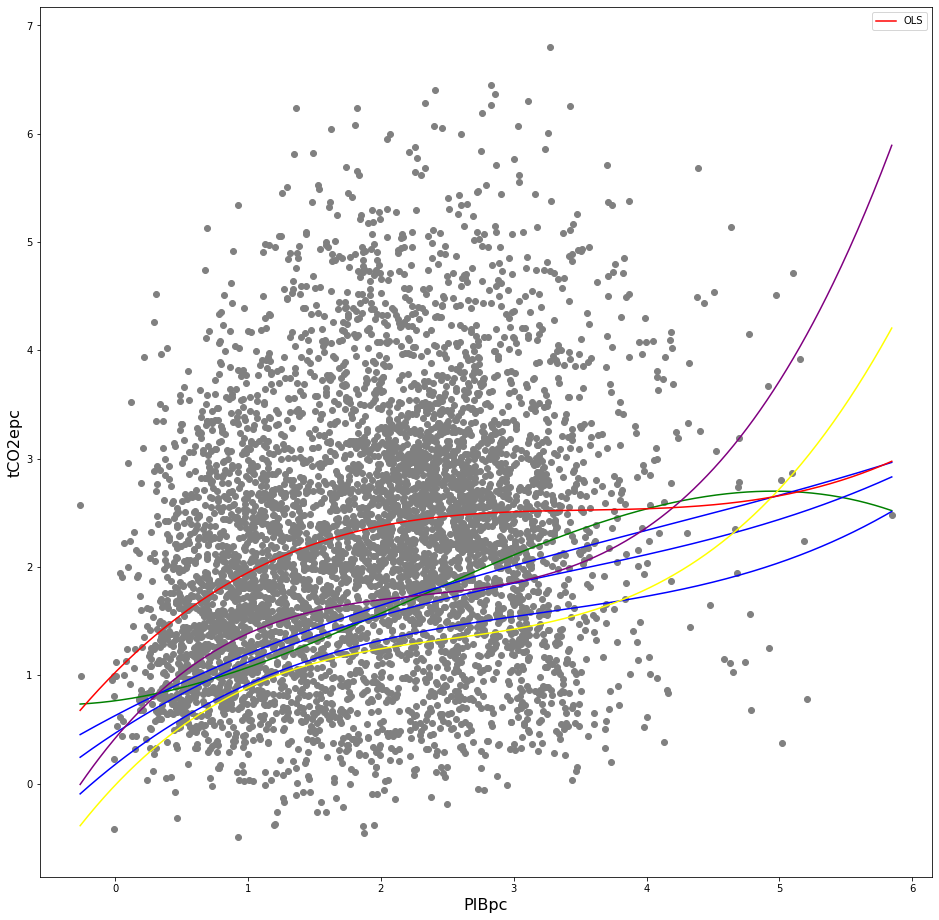

In [114]:
#Regressão Quantilica com o modelo cubico
x1 = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y6 =  0.7648 + 0.1624*(x1) +0.1709*(x1*x1) -0.0252*(x1*x1*x1)
y7 =  0.6280 + 0.6438*(x1) -0.0809*(x1*x1) + 0.0067*(x1*x1*x1)
y8 =  0.4657 + 0.8001*(x1) -0.1606*(x1*x1) + 0.0159*(x1*x1*x1)
y9 =  0.1766 + 0.9622*(x1) -0.2459*(x1*x1) + 0.0256*(x1*x1*x1)
y10 = -0.0142 + 1.2947*(x1) -0.4546*(x1*x1) + 0.0610*(x1*x1*x1)
y11 = 0.4193 + 1.4597*(x1) -0.5771*(x1*x1) + 0.0834*(x1*x1*x1)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x1, y6, color="green")
ax.plot(x1, y7, color="blue")
ax.plot(x1, y8, color="blue")
ax.plot(x1, y9, color="blue")
ax.plot(x1, y10, color="yellow")
ax.plot(x1, y11, color="purple")



ax.plot(x1, ymod4, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)